#### Import the necesary libraries

In [1]:
import pandas as pd
import calendar
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

print('Libraries have been imported !')

Libraries have been imported !


#### Open the excel file and open the sheet named:  '6. Precio OIC Mensual'
#### Delete the first 5 Rows and rename the Columns

In [2]:
url = 'https://federaciondecafeteros.org/app/uploads/2020/01/Precios-%C3%A1rea-y-producci%C3%B3n-de-caf%C3%A9.xlsx'
# name of the file
#file = pd.ExcelFile('coffee prices.xlsx')

# name of the sheet '6. Precio OIC Mensual'
df = pd.read_excel(url, sheet_name = '6. Precio OIC Mensual')
# df = pd.read_excel(file, sheet_name = '6. Precio OIC Mensual')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,Precios indicativos OIC por grupos - Promedio ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Centavos de dólar por libra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Fuente: ICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Suaves colombianos (arábigo),NaN,NaN,Otros suaves (arábigo),NaN,NaN,Naturales del Brasil (arábigo),NaN,NaN,Robustas,NaN,NaN,NaN


In [3]:
# removes the first column as it doesn't have any data
df = df.drop(df.columns[[0,-1]], axis = 1)

# remove the first 5 columns as is part of the format in the excel file
df = df.drop(index = df.index[0:6],
       axis = 0)

# because the first 5 rows where deleted, I need to reset the index to be 0 and not to start at row # 6
df = df.reset_index(drop=True)

In [4]:
# renames the column for an easier comprenhesion 
df = df.rename(columns = {'Unnamed: 1': 'Date', 'Unnamed: 2':'OIC_price',
                          'Unnamed: 3':'Colombia_ny', 'Unnamed: 4':'Colombia_europe', 'Unnamed: 5':'Colombia_average',
                          'Unnamed: 6':'Other_ny', 'Unnamed: 7':'Other_europe','Unnamed: 8':'Other_average',
                          'Unnamed: 9':'Brazil_ny', 'Unnamed: 10':'Brazil_europe', 'Unnamed: 11':'Brazil_average',
                          'Unnamed: 12':'Robustas_ny', 'Unnamed: 13':'Robustas_europe','Unnamed: 14':'Robustas_average'})
df.head()

,Date,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
0,2000-01-01 00:00:00,82.15,130.12,124.36,130.13,109.17,116.82,111.11,97.67,103.1,97.68,53.62,52.41,53.18
1,2000-02-01 00:00:00,76.15,124.72,118.67,124.73,101.17,110.19,103.44,91.51,96.58,91.51,49.41,47.97,48.85
2,2000-03-01 00:00:00,73.49,119.51,115.78,119.51,98.26,108.13,100.73,89.93,94.78,89.93,47.26,44.73,46.25
3,2000-04-01 00:00:00,69.53,112.67,109.12,112.67,92.41,101.51,94.61,86.46,90.7,86.46,45.21,43.31,44.45
4,2000-05-01 00:00:00,69.22,110.31,107.85,110.31,91.76,100.99,94.17,87.23,91.01,87.23,45.19,43.01,44.32


## Exploratory Data Analysis

#### Checking how many NA's are there in the dataset, what type of each column is, how many columns we have and in general all the information from the data 

In [5]:
# exploring the data types and if there are NA's
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              272 non-null    object
 1   OIC_price         272 non-null    object
 2   Colombia_ny       272 non-null    object
 3   Colombia_europe   272 non-null    object
 4   Colombia_average  272 non-null    object
 5   Other_ny          272 non-null    object
 6   Other_europe      272 non-null    object
 7   Other_average     272 non-null    object
 8   Brazil_ny         272 non-null    object
 9   Brazil_europe     272 non-null    object
 10  Brazil_average    272 non-null    object
 11  Robustas_ny       272 non-null    object
 12  Robustas_europe   272 non-null    object
 13  Robustas_average  272 non-null    object
dtypes: object(14)
memory usage: 29.9+ KB


#### The types of the columns are object, Changing them for numeric type float, so we can see the statistics

In [6]:
# changes the format of the column 'Date' for just the year and the month
df['Date'] = pd.to_datetime(df['Date'], format = '%d%m%Y')

# creates a list with the names of the columns, removes the first item 'Date, changes the type to float
lista = list(df.columns)
lista.pop(0)
for item in lista:
    df[item] = df[item].astype(float)
    
# check that the changes have been donde
df.describe()

,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,113.633237,153.333888,148.409523,151.222932,145.099616,143.098234,143.966330,118.365112,123.408718,121.959193,79.670588,74.456376,75.376692
std,43.687941,62.437782,59.732402,61.156478,58.414410,55.916915,56.927377,49.732689,51.170812,50.984818,28.448193,26.567300,26.767165
min,41.170000,58.920000,57.720000,58.100000,51.950000,55.760000,54.280000,37.670000,38.710000,38.630000,21.250000,22.790000,22.810000
25%,88.547500,112.940000,111.697500,112.670000,108.720000,110.295000,109.712500,94.405000,96.056883,95.605714,57.895000,54.765000,55.347500
50%,113.155682,144.413636,141.123636,143.529552,141.896818,138.104348,140.704773,111.980000,117.983409,116.833333,84.680554,78.150682,79.203636
75%,133.130252,182.577237,178.760455,179.022500,169.232857,165.942045,166.686126,132.726023,143.199599,140.728880,103.530147,97.329432,98.367841
max,231.240000,319.633750,311.450000,312.950000,303.590000,297.220000,300.120000,271.390000,273.430000,273.400000,126.300000,121.300000,121.980000


#### The correlation between the attributes

In [21]:
# to check the correlation
df.corr()

,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
OIC_price,1.000000,0.961247,0.974154,0.968370,0.983946,0.987328,0.986648,0.981872,0.988744,0.989057,0.902821,0.883472,0.888010
Colombia_ny,0.961247,1.000000,0.989911,0.997974,0.978964,0.978009,0.977207,0.953280,0.950817,0.952474,0.795684,0.761376,0.768793
Colombia_europe,0.974154,0.989911,1.000000,0.996692,0.979493,0.986822,0.982911,0.962704,0.967117,0.967156,0.810751,0.783200,0.789372
Colombia_average,0.968370,0.997974,0.996692,1.000000,0.981455,0.984258,0.981992,0.959397,0.959980,0.960859,0.802224,0.770656,0.777598
Other_ny,0.983946,0.978964,0.979493,0.981455,1.000000,0.995489,0.996963,0.971176,0.977323,0.977294,0.845858,0.812284,0.819485
Other_europe,0.987328,0.978009,0.986822,0.984258,0.995489,1.000000,0.997574,0.975087,0.984532,0.983430,0.841851,0.813314,0.819732
Other_average,0.986648,0.977207,0.982911,0.981992,0.996963,0.997574,1.000000,0.973195,0.981179,0.980708,0.846334,0.816121,0.822735
Brazil_ny,0.981872,0.953280,0.962704,0.959397,0.971176,0.975087,0.973195,1.000000,0.994153,0.996667,0.838267,0.819359,0.823952
Brazil_europe,0.988744,0.950817,0.967117,0.959980,0.977323,0.984532,0.981179,0.994153,1.000000,0.999492,0.856312,0.837155,0.841898
Brazil_average,0.989057,0.952474,0.967156,0.960859,0.977294,0.983430,0.980708,0.996667,0.999492,1.000000,0.854775,0.835624,0.840293


Text(0.5, 1.0, 'Heatmap Correlation')

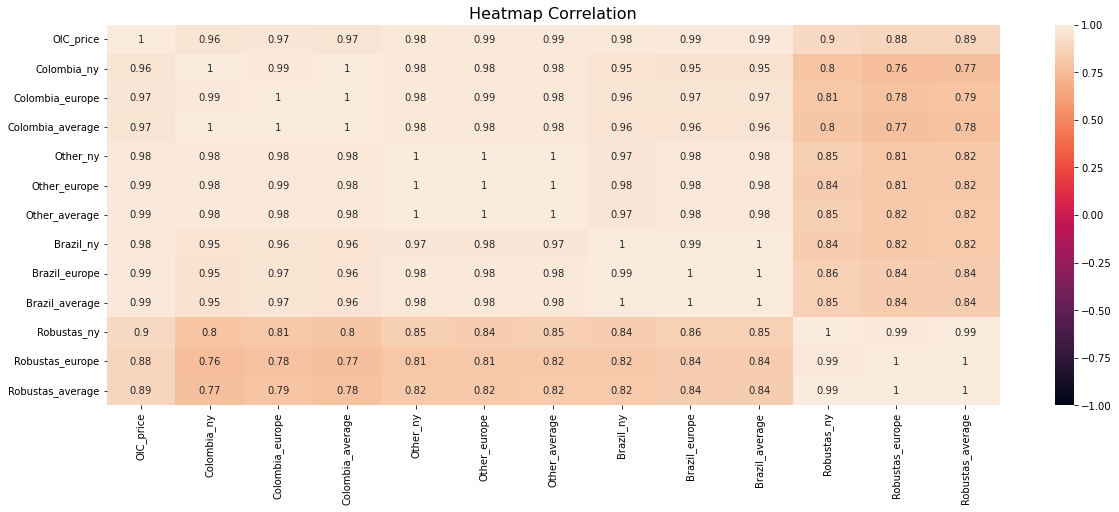

In [22]:
# checking the correlation visually on a heat map

plt.figure(figsize = (20,7))
hm = sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
hm.set_title('Heatmap Correlation', fontdict = {'fontsize':16})


#### Doing a box plot for each of the columns

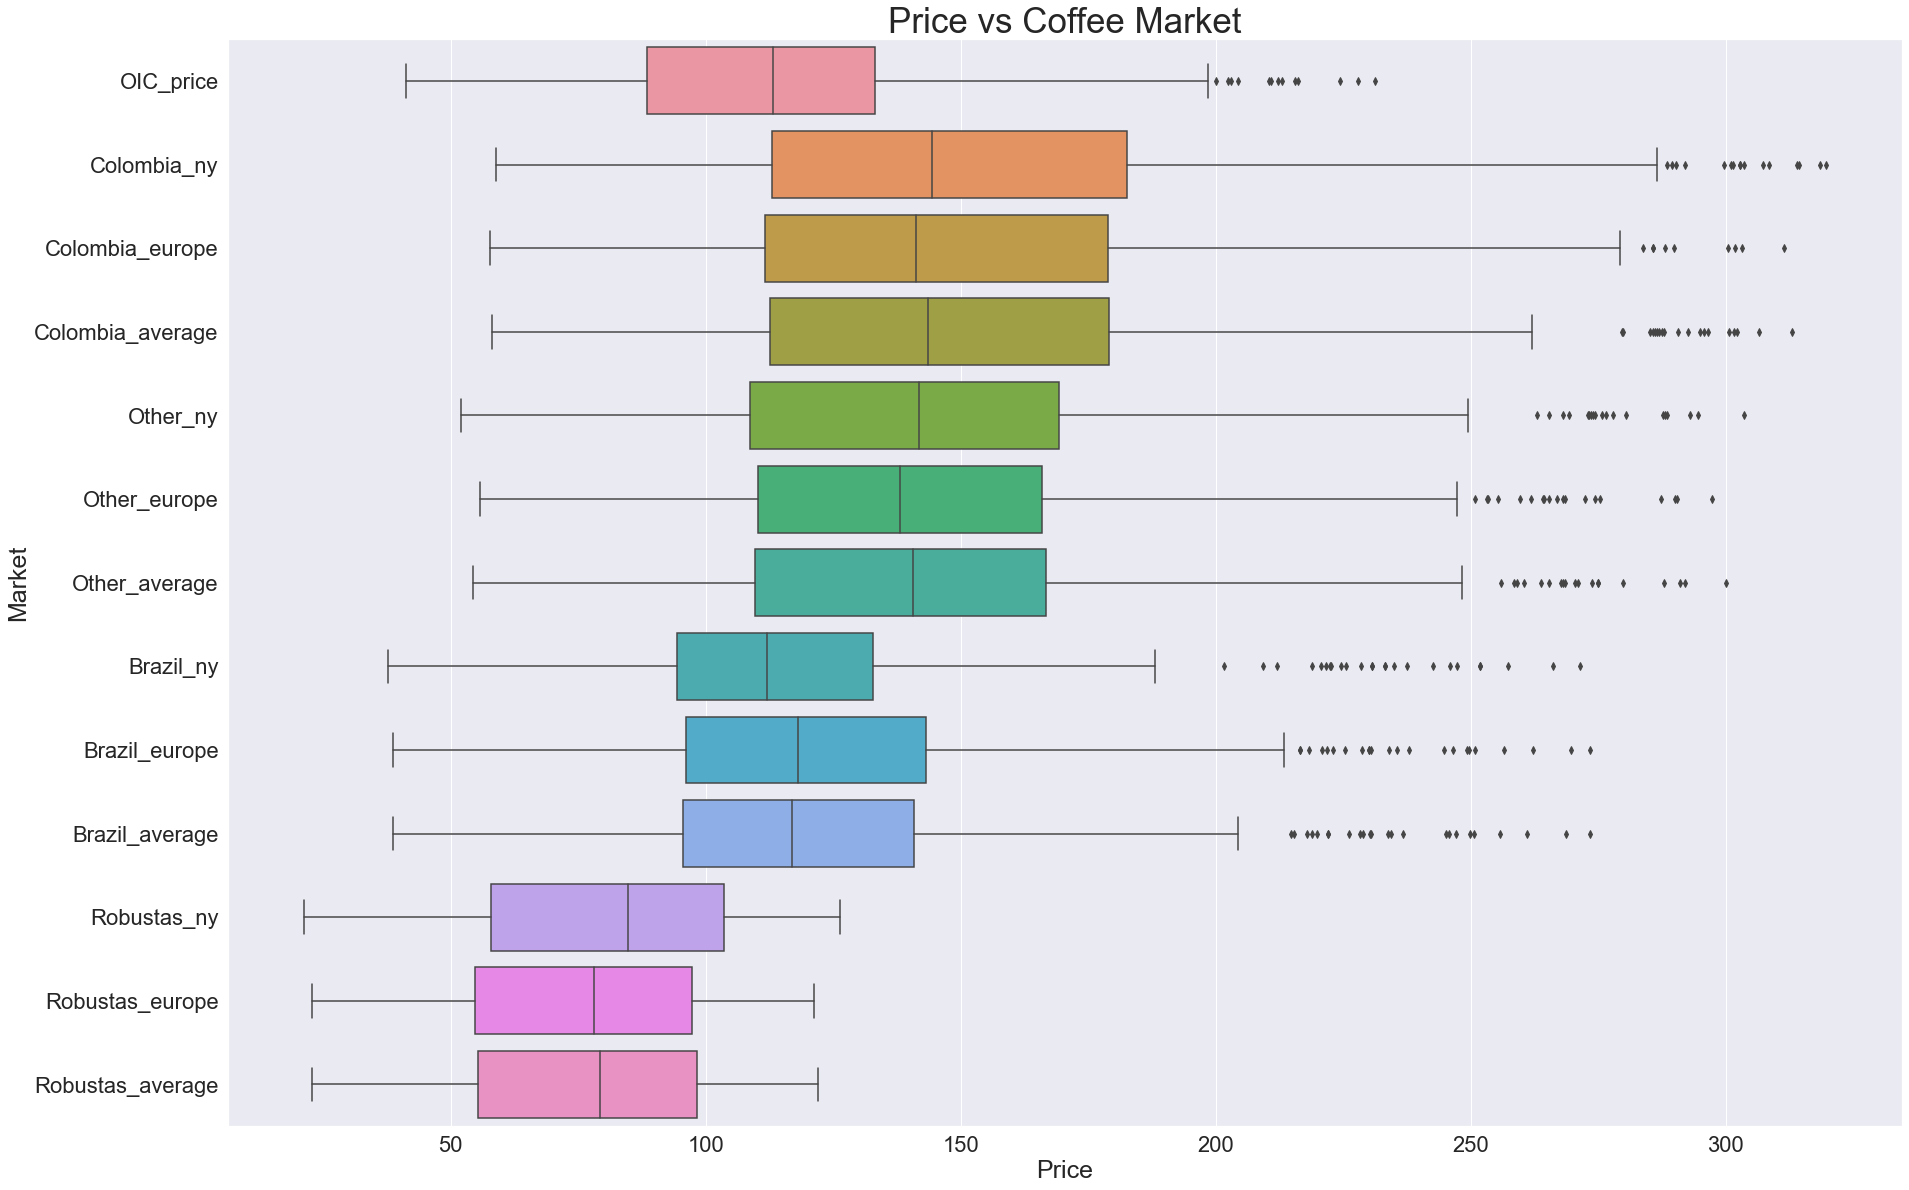

In [23]:
# incresesthe size of the graph
plt.figure(figsize=(30,20))

# increases the size of the font
sns.set(font_scale=2)

# sets the data and the orientation
s = sns.boxplot(data = df, orient = 'h')

# label in x and the size of it
s.set_xlabel('Price', fontsize = 25)

# label in y and the size of it
s.set_ylabel('Market', fontsize = 25)

# title and its size
s.set_title('Price vs Coffee Market', fontsize = 35)

# show the graph!
plt.show()

#### The type of coffe calles Robustas, has the lowest prices, while Colombian Coffee has the highest prices and the 25% of Colombian Coffee price is basically the median of the OIC Price 

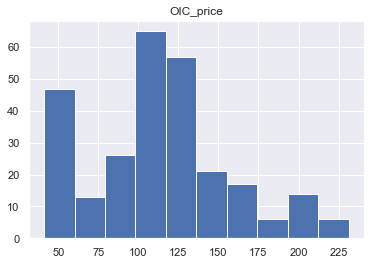

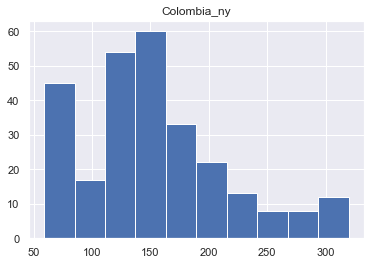

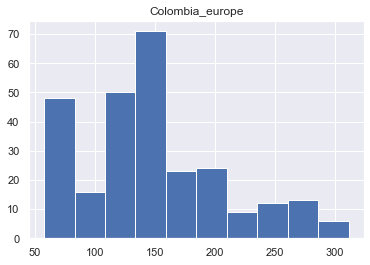

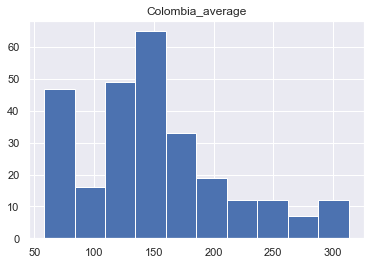

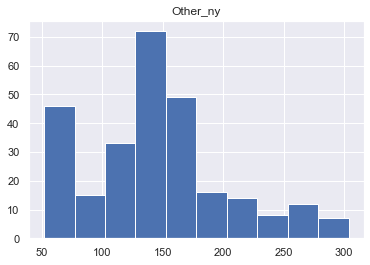

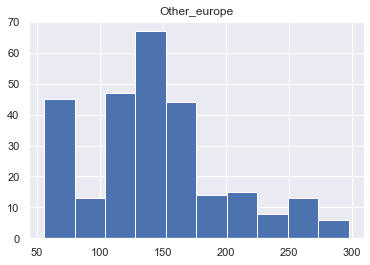

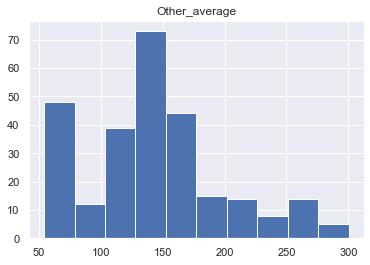

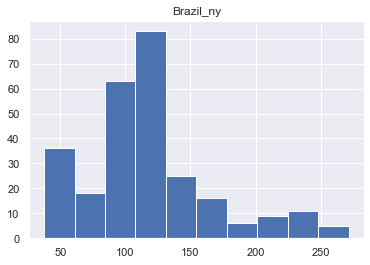

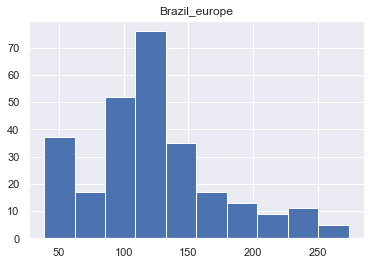

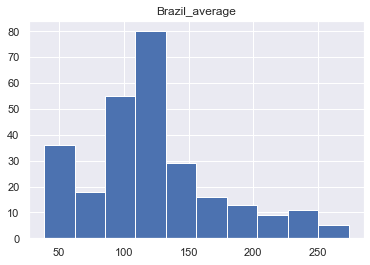

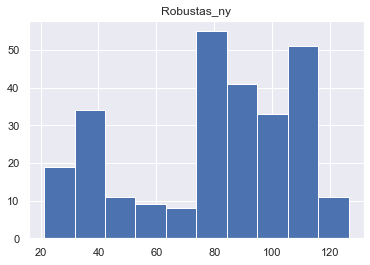

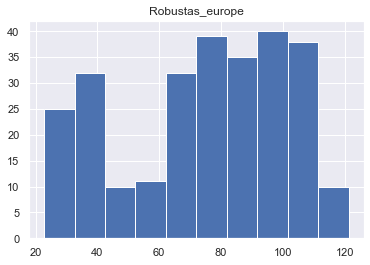

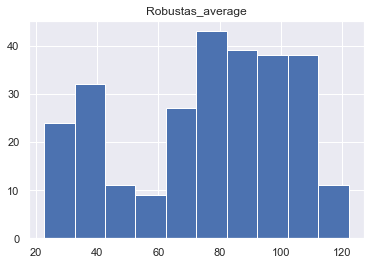

In [67]:
for i in lista:
    df.hist(column = i)
    plt.show()

In [65]:
df[df['Colombia_europe'] >= 300].count()

Date                4
OIC_price           4
Colombia_ny         4
Colombia_europe     4
Colombia_average    4
Other_ny            4
Other_europe        4
Other_average       4
Brazil_ny           4
Brazil_europe       4
Brazil_average      4
Robustas_ny         4
Robustas_europe     4
Robustas_average    4
dtype: int64

#### Graphing all columns, as a time series, to compare all of them together

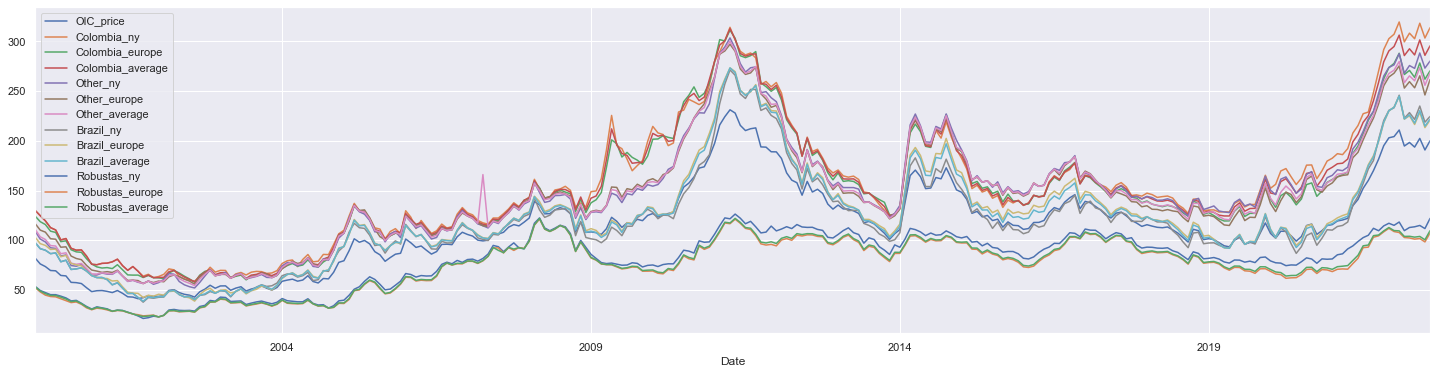

In [25]:
# create a list with th enames of the columns
lista = list(df.columns)
#  removes the first item of the list, which is 'Date'
lista.pop(0)

# increases the size of the font
sns.set(font_scale=1)
# selects the size of the column
plt.figure(figsize=(25,6))
# plots the axes
ax = plt.gca()

# creates a loop graphing all the columns vs 'Date'
for column in lista:
    df.plot(x ='Date', y = column, ax = ax)

#### Comparing just the averages and the OIC prices

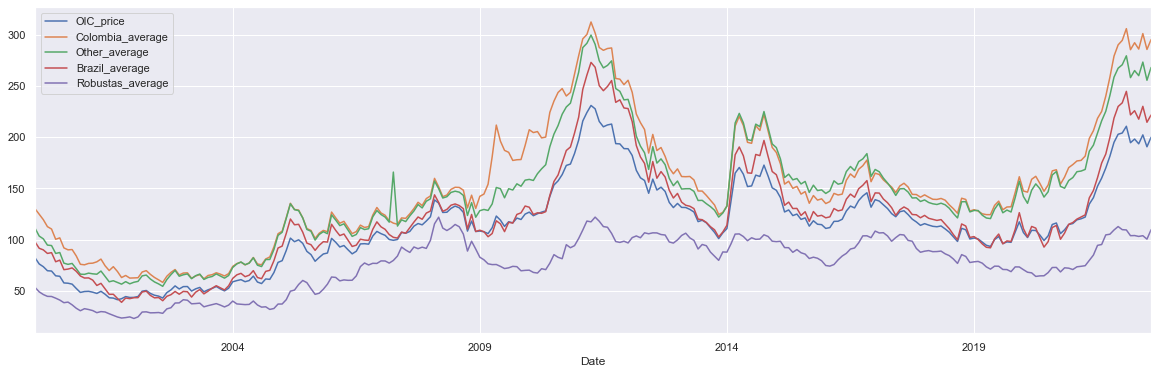

In [26]:
lista_averages = ['OIC_price', 'Colombia_average', 'Other_average', 'Brazil_average', 'Robustas_average']
# selects the size of the column
plt.figure(figsize=(20,6))
# plots the axes
ax = plt.gca()

# creates a loop graphing all the columns vs 'Date'
for column in lista_averages:
    df.plot(x ='Date', y = column, ax = ax)

In [27]:
df.tail(10)

,Date,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
262,2021-11-01,195.170502,291.925000,262.477390,279.556818,265.255729,255.410813,258.954983,220.524432,218.297860,218.899034,114.425545,108.444123,109.401150
263,2021-12-01,203.064137,302.822464,273.660408,290.550870,273.881341,264.241862,267.712074,230.715580,230.096676,230.263780,117.054688,111.942959,112.760836
264,2022-01-01,204.294186,307.276190,277.883253,294.930952,276.463690,268.054789,271.081994,233.252381,234.004200,233.801209,114.979223,108.710484,109.713483
265,2022-02-01,210.891498,319.633750,288.145451,306.408665,287.707188,275.403651,279.832924,245.921250,244.721394,245.045355,118.310654,107.734096,109.426346
266,2022-03-01,194.783913,299.628261,266.739130,285.813658,268.028841,253.117617,258.485657,222.641159,221.801144,222.027948,109.632906,102.716001,103.822706
267,2022-04-01,198.370952,308.385238,270.898095,292.640952,275.785238,259.555714,265.398571,228.407619,225.266190,226.114286,112.821429,102.276190,103.963333
268,2022-05-01,193.707041,302.767424,263.893594,286.440415,272.925663,253.382948,260.418325,221.562121,216.468383,217.843692,113.516303,101.111967,103.096661
269,2022-06-01,202.457724,318.385227,278.357101,301.573636,288.402652,265.413811,273.689794,235.030303,228.682450,230.396370,114.863462,101.703199,103.808841
270,2022-07-01,190.817928,303.479762,262.027024,286.069612,273.196429,246.181025,255.906570,218.775000,213.335313,214.804029,111.724980,98.295592,100.444294
271,2022-08-01,200.110000,313.870000,270.510000,295.660000,280.340000,261.730000,268.430000,224.610000,220.910000,221.910000,122.020000,107.290000,109.650000


### Normalizing the Dataframe

#### To normalize the data, I am going to create two  dataframes, one without the ['Date'] column, and another one just with the ['Date'] column, once is normalized with MinMaxScaler(), and converte to a dataframe will be appended to the first dataframe that contains only the column ['Data'] 

In [ ]:
# select the column 'date' to concatenate it later with the scaled dataframe
date = df[['Date']]

# drop the column 'Date' as is not numeric but a date type
df_to_be_scaled = df.drop(['Date'], axis = 1)

# saves the names of the columns as they will be needed later
column_names = list(df_to_be_scaled.columns)

In [ ]:
# create functions to do normalization or standarization
def MinMax_normalizer(data):
    '''Function that applies normalization with the Minimum and Maximum to the dataframe and then adds the names
    to the columns'''
    from sklearn.preprocessing import MinMaxScaler
    
    # normalizing with MinMaxScaler()
    scaler = MinMaxScaler()

    # fits and transforms the dataframe
    array_scaled = scaler.fit_transform(data)
    
    # takes the array back as a dataframe
    df_exit = pd.DataFrame(array_scaled)

    # renames the dataframe with the saved names from above
    df_exit.columns = column_names

    return df_exit
          
    
def Standar_normalizer(data):
    '''Function that applies standarization with the Standar deviation to the dataframe and then adds the names to the columns'''
    from sklearn.preprocessing import StandardScaler
    
    # normalizing with standar deviation
    scaler = StandardScaler()
    
    # fits and transforms the dataframe
    array_scaled = scaler.fit_transform(data)
    
    # takes the array back as a dataframe
    df_exit = pd.DataFrame(array_scaled)

    # renames the dataframe with the saved names from above
    df_exit.columns = column_names

    return df_exit 

In [ ]:
# Normalizing with MinMaxScaler and StandarScaler
df_MinMax = MinMax_normalizer(df_to_be_scaled)
df_Standard = Standar_normalizer(df_to_be_scaled)

# concatenating both dataframes and checking the result
df_MinMax = pd.concat([date, df_MinMax], axis = 1)
df_Standard = pd.concat([date, df_Standard], axis = 1)

In [ ]:
# checking the statistics 
df_MinMax.describe()

In [ ]:
# checking the statistics 
df_Standard.describe()

In [ ]:
# checking that the distribution on the histogram of both, Normalization and Standarization is the same as the original 'df'
df_Standard.hist()
df_MinMax.hist()
plt.show()

### Split the data frame intro Train set (X) and Test set (y)

In [ ]:
# function that does train_test_split()
def Train_Test_Split(X,y):
    '''Function that splits the dataframe into Train and Test '''
    from sklearn.model_selection import train_test_split
    
    # creates X_train,X_test,y_train,y_test FROM the variables X and y, using 30% of the dataset for testing.
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=10)
    
    return X_train, X_test, y_train, y_test

In [ ]:
# working with NORMALIZATION or df_MinMax

# Split the dataframe, select only the averages columns
X = df_MinMax[['Colombia_average', 'Other_average','Brazil_average','Robustas_average']]

# from df_scaled, select 'OIC_price'
y = df_MinMax[['OIC_price']]

# using the function Train_Test_Split
X_train, X_test, y_train, y_test = Train_Test_Split(X,y)

print(f'X_train has {len(X_train)} elements')
print(f'y_train has {len(y_train)} elements')
print(f'X_test has {len(X_test)} elements')
print(f'y_test has {len(y_test)} elements')

### Neural Network

In [ ]:
# dense layer (from one neuron to all neurons)
# units = 1, the number of output layers (in this case, I need OIC_price, which is 1 neuron)
#input_shape = 4, is the amount of input neurons, in this case I have 4 values: 
#              'Colombia_average','Other_average','Brazil_average','Robustas_average'
#layer = tf.keras.layers.Dense(units = 1, input_shape = [4])

# I have to build a model for the layers, in this case is the Sequential that is for a neural network thta is not advanced
#model = tf.keras.Sequential([layer])

model = Sequential
model.add

In [ ]:
# I have to prepare the model to be trained (this is called compiler)
# I use an optimizer called Adam, allows the network how to use the bias and weights in an efficient way
# so it t it learns and instead of unlearning ( get better step by step)
# learning rate is 0.1, which indicates how to adjust the weights and bias

# for a loss I am going to use 'mean_squared_error', basically small amount of big errors is worst that biga amount of small errors
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss ='mean_squared_error'
)

In [ ]:
print('Begining Training...')
# epochs  = 1000 , is how many times I want it to loop (1 loop mean checking all 272 entries)
# usually the more epochs better training but only until certain point
# verbose = false, so it doesn't print anything
historial = modelo.fit(X,y,epochs = 1000, verbose = False)
print('Model has been trained!')

In [ ]:
# to see the loss, basiucally how bad are the results with each loop taht it did
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.plot(historial.history['loss'])

In [ ]:
print('Hagamos una prediccion!')
resultado = modelo.predict([[0.498960], [0.552066], [0.531882], [0.758294]])
print(f'El resultado es {resultado} OIC_price!')


In [ ]:
print('variables internas del modelo')
print(layer.get_weights())
# y = C*1.7981566 + 31.92808

In [ ]:
X_test.head()

In [ ]:
y_test.head()

In [ ]:
X_test.iloc[0]

In [ ]:
y_test.iloc[0]